
<img align="left" src=https://www.if.ufrj.br/wp-content/themes/img/if.png         width=120 style="padding: 30px"> 
<img align="left" src=https://ufrj.br/wp-content/uploads/2024/02/cor-vertical.png width=100 style="padding: 30px"> <br>

# 7a Escola de Física Experimental da UFRJ  
## Medidas de redshifts de galáxias em levantamentos cosmológicos usando técnicas de aprendizado de máquina 



Professores:   
- Bruno Moraes (email)
- Julia Gschwend (julia@linea.org.br)

Última verificação: 14/02/2025

***

## 0. Introdução 

### Sobre a oficina

### Sobre o LIneA 

<img align="left" src=https://www.linea.org.br/brand/linea-logo-color.svg         width=120 style="padding: 20px">
O Laboratório Interinstitucional de e-Astronomia (LIneA) é um laboratório multiusuário apoiado pelo governo federal através do Ministério da Ciência, Tecnologia e Inovação, sem vínculo com nenhuma unidade de pesquisa em particular. Nossa missão é apoiar a comunidade astronômica nacional com infraestrutura computacional e expertise em análise de big data, fornecendo condições técnicas para participação brasileira em grandes levantamentos, como o Sloan Digital Sky Survey (SDSS), Dark Energy Survey (DES) e Legacy Survey of Space and Time (LSST). 

Para saber mais, acesse o nosso site **https://linea.org.br**, ou visite nosso canal no YouTube ([**@linea_org**](https://www.youtube.com/@linea_org)) e os nossos perfis nas redes sociais. Confira abaixo a nossa trilogia de vídeos institucionais curtos sobre o LIneA, o LSST IDAC-Brasil, e o INCT do e-Universo:  

In [1]:
%%html 
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Video Grid</title>
    <style>
        .grid-container {
            display: grid;
            grid-template-columns: repeat(3, 1fr); /* Creates 3 equal columns */
            gap: 10px; /* Adjust spacing between grid items */
            padding: 10px;
        }

        .grid-item {
            position: relative; /* For aspect ratio handling */
            padding-bottom: 56.25%; /* 16:9 aspect ratio (9 / 16 * 100) */
            height: 0;
            overflow: hidden;
        }

        .grid-item iframe {
            position: absolute;
            top: 0;
            left: 0;
            width: 100%;
            height: 100%;
        }
    </style>
</head>
<body>

<div class="grid-container">
    <div class="grid-item">
        <iframe width="560" height="315" src="https://www.youtube.com/embed/4oiEKtzTkTA?si=mepeI8-Th0chWsQe" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
    </div>
    <div class="grid-item">
        <iframe width="560" height="315" src="https://www.youtube.com/embed/j0NCNa2-u8E?si=SDvlxAnR-0mKquU-" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
    </div>
    <div class="grid-item">
        <iframe width="560" height="315" src="https://www.youtube.com/embed/TX61BMryKbo?si=bH-RQ4tvcVbgGY6v" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
    </div>
</div>

</body>
</html>

### Sobre o JupyterHub

O LIneA JupyterHub ([**jupyter.linea.org.br**](https://jupyter.linea.org.br)) é um serviço gratuito de acesso remoto a um ambiente de desenvolvimento de software e análise exploratória de dados conectado a um banco de dados Postgres que contém acervos de dados astronômicos, públicos e privados, e que está integrado a outras ferramentas de análise e visualização de dados, como o Sky Viwer, Target Viewer e User Query. 

Os usuários do serviço contam com a ajuda de especialistas em TI e em dados astronômicos através do e-mail [**helpdesk.linea.org.br**](mailto:helpdesk.linea.org.br).  

Neste notebook você encontrará todas as instruções necessárias para a realização da Oficina no JupyterHub. Para outras aplicações, uma série de tutoriais está disponível no repositório Git [**jupyterhub-tutorial**](https://github.com/linea-it/jupyterhub-tutorial). 

# 1. Login, repositório e bibliotecas

A maioria das bibliotecas Python necessárias para executar este notebook já vem instaladas por _default_ no ambiente. Para instalar as demais (`dblinea`, `astropy`), basta executar a célula abaixo. OBS: a instalação é válida apenas para esta sessão no kernel Python 3 (ipykernel).  

In [3]:
! pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 1.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "/Users/brunomor/miniforge3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 389, in <module>
          main()
        File "/Users/brunomor/miniforge3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Users/brunomor/miniforge3/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 137, in get_requires_for_build_wheel
          backend = _

In [15]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as u
from astropy.coordinates import SkyCoord
import skyproj
import dblinea 

# Machine learning libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

# 3. Dados

#### Sobre os dados

##### Dados fotométricos 

Nesta atividade, usaremos um conjunto de dados previamente combinados e parcialmente tradados, que foram obtidos de diferentes fontes. Os dados fotométricos são oriundos do [Dark Energy Survey (DES)](https://www.darkenergysurvey.org/), um levantamento fotométrico em 5 bandas do óptico ao infravermelho (_grizY_) que tem como principal objetivo a determinação da equação de estado da energia escura. O DES observou ~700 milhões de objetos detectados em ~5000 graus quadrados no hemisfério sul durante 6 anos. Os artigos com os principais resultados da análise dos dados dos três primeiros anos de observação estão disponíveis [nesta página](https://www.darkenergysurvey.org/des-year-3-cosmology-results-papers/).  

<img align="center" src=https://www.darkenergysurvey.org/wp-content/uploads/2021/06/dr2_footprint.png  width=500 style="padding: 20px"> <br> 
Figura: Footprint Data Release 2 (fonte: [www.darkenergysurvey.org](https://www.darkenergysurvey.org/wp-content/uploads/2021/06/dr2_footprint.png)).  

O [segundo _data release_ (DR2)](https://des.ncsa.illinois.edu/releases/dr2), já contendo os dados dos seis anos de observação, está disponível para público e pode ser acessado pelo [LIneA Science Server](https://scienceserver.linea.org.br) ou aqui pelo JupyterHub, como veremos a seguir. Os artigos finais utilizando os dados dos 6 anos ainda estão em preparação.

Os dados que vamos utilizar já foram extraídos das imagens do céu, pré-processados e disponibilizados de forma tabular no banco de dados. 

##### Dados espectroscópicos 

Para treinar os algoritmos de aprendizado de máquina precisamos fornecer medidas conhecidas de **redshift (z)** de um subconjunto dos dados. Para isto, vamos utilizar dados obtidos de levantamentos espectroscópicos (spec-z) que, devido a sua enorme precisão, são considerados como valores "verdadeiros", ou seja, com erros nulos. 

As medidas de spec-z que vamos utilizar estão disponíveis em um catálogo, já combinado com os dados fotométricos do DES, que foi produzido como parte da contribuição do LIneA para o projeto. A nossa equipe de cientistas de dados fez uma curadoria das medidas de spec-z dos principais levantamentos disponíveis até o último ano de observações do DES (28 levantamentos) e montou um catálogo único de spec-zs, com dados limpos e homogeneizados, associados às galáxias do DES através das posições em coordenadas equatoriais (R.A. e Dec.). Este catálogo foi utilizado para alimentar os conjuntos de treinamento utilizados na produção de medidas de redshift fotométrico (photo-z) que estão sendo utilizadas nos artigos de cosmologia em preparação.  

<img align="center" src=https://dev.linea.org.br/~julia/specz_spatial_dist.png  width=500 style="padding: 20px"><img align="center" src=https://dev.linea.org.br/~julia/specz_matched_spatial_dist.png width=500 style="padding: 20px">  

Na figura acima observamos a distribuição espacial heterogênea resultante da combinação de várias fontes de dados. No segundo mapa, vemos em destaque as medidas de spec-z que caem dentro da regição observada pelo DES (_footprint_). A caracterização completa desta amostra está disponível na [área de contribuição dos usuários](https://github.com/linea-it/jupyterhub-tutorial/blob/main/users-notebooks/spectroscopic-redshifts.ipynb), no mesmo repositório dos tutoriais do LIneA JupyterHub. 

#### Acesso ao banco de dados

Dentro da plataforma LIneA JupyterHub, o acesso ao banco de dados é feito através da biblioteca [dblinea](https://github.com/linea-it/dblinea). Confira a documentação completa da biblioteca [neste link](https://dblinea.readthedocs.io/en/latest/index.html).

A classe `DBBase` faz a conexão com o banco de dados e oferece algumas funcionalidades como veremos a seguir. Nos exemplos abaixo, vamos utilizar o objeto `db` para acessar os dados e metadados da tabela  "**public_pz_training_set**" do segundo _release_ (**DR2**) do levantamento **DES**. 

In [16]:
from dblinea import DBBase
db = DBBase() 

Nomes das colunas presentes na tabela  "**public_pz_training_set**":  

In [17]:
print(db.get_table_columns(tablename='public_pz_training_set', schema='des_dr2')) 

OperationalError: (psycopg2.OperationalError) could not translate host name "desdb4.linea.gov.br" to address: nodename nor servname provided, or not known

(Background on this error at: https://sqlalche.me/e/20/e3q8)

Tipos de dados armazenados em cada coluna: 

In [ ]:
db.describe_table(tablename='public_pz_training_set', schema='des_dr2')

A tabela abaixo traz a descrição das colunas que vamos utilizar neste _notebook_. 

|Coluna | Descrição |
|---|---|
|RA | Abreviação de _Right Ascension_, coordenada celeste equatorial no sistema J2000 (unidade: graus)|
|DEC | Abreviação de _Declination_, coordenada celeste equatorial no sistema J2000 (unidade: graus)   |
|MAG_AUTO_{G,R,I,Z,Y}_DERED | Medida de magnitude aparente corrigida do avermelhamento da Galáxia (adimensional) |
|MAGERR_AUTO_{G,R,I,Z,Y}    | Incerteza na medida de magnitude aparente (adimensional) |
|z | Medida de _redshift_ espectroscópico |
|survey | Nome do levantamento espectroscópico que realizou a medida de _redshift_ |



Para esta atividade, vamos selecionar dados do levantamento [VVDS](https://cesam.lam.fr/cesamdata/project_desc/vvds_index.html) ([Le Fèvre et al. 2004](https://ui.adsabs.harvard.edu/abs/2004A%26A...428.1043L/abstract), [Garilli et al. 2008](https://ui.adsabs.harvard.edu/abs/2008A%26A...486..683G/abstract)).  


A função `fetchall_df(query)` faz a consulta no banco de dados e retorna um objeto do tipo [**pandas.DataFrame**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) 

In [ ]:
query = """
            SELECT
                ra, dec, z, 
                mag_auto_g_dered, mag_auto_r_dered, mag_auto_i_dered, mag_auto_z_dered, mag_auto_y_dered,  
                magerr_auto_g, magerr_auto_r, magerr_auto_i, magerr_auto_z, magerr_auto_y  
            FROM
                des_dr2.public_pz_training_set
            WHERE
                survey = 'VVDS' 
            AND 
                magerr_auto_g <= 0.1 
            AND 
                magerr_auto_r <= 0.1 
            AND 
                magerr_auto_i <= 0.1 
            AND 
                magerr_auto_z <= 0.1 
            AND 
                z <= 2.0 
        """

In [ ]:
df = db.fetchall_df(query)
df

In [ ]:
df.info()

In [ ]:
df.describe()

#### Separação das amostras 

Divisão dos dados em dois subconjuntos, para treinamento e teste (ou validação). 

In [ ]:
# ordenação aleatória com random_state fixo para garantir a reprodutibilidade 
df_shuffled = df.sample(frac=1, random_state=42) 

# ponto de corte: proporção 70/30
split_point = int(len(df)*0.7)

# separa em dois subconjuntos 
train = df_shuffled.iloc[:split_point]
test  = df_shuffled.iloc[split_point:]

print(f'Os conjuntos de treinamento e teste possuem {len(train)} e {len(test)} galáxias, respectivamente.') 

### Caracterização das amostras 

#### Distribuição espacial 


In [ ]:
coords = SkyCoord(ra=-np.array(df.ra)*u.degree, dec=np.array(df.dec)*u.degree, frame='icrs')

NameError: name 'coords' is not defined

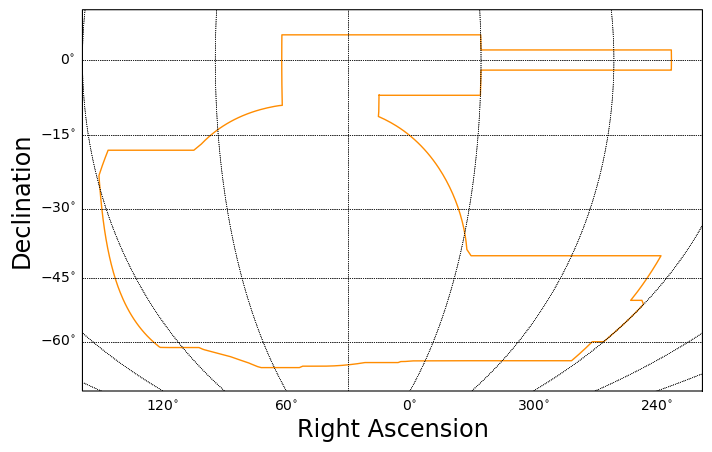

In [13]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111)
sp = skyproj.DESSkyproj(ax=ax)
sp.draw_des(label='DES', edgecolor='darkorange', lw=1)
ra_rad = coords.ra.wrap_at(180 * u.deg).radian
dec_rad = coords.dec.radian
plt.plot(ra_rad, dec_rad, '.', alpha=0.3)
org=0.0
tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
tick_labels = np.remainder(tick_labels+360+org,360)
sp.legend()
plt.tight_layout()

#### Distribuição de redshifts

In [ ]:
fig = plt.figure(figsize=[12,4])
plt.subplot(1,3,1)
sns.histplot(df['z'], stat='density', bins=30, label='all')
sns.kdeplot(df['z'], fill=False, color='red')
plt.xlabel('spec-z', fontsize=11)
plt.legend()
plt.subplot(1,3,2)
plt.title('Distribuição de redshifts')
sns.histplot(train['z'], stat='density', bins=30, label='training set')
sns.histplot(test['z'], stat='density', bins=30, label='test set')
plt.xlabel('spec-z', fontsize=11)
plt.legend()
plt.subplot(1,3,3)
sns.histplot(train['z'], stat='count', bins=30, label='training set')
sns.histplot(test['z'], stat='count', bins=30, label='test set')
plt.xlabel('spec-z', fontsize=11)
plt.legend()
plt.tight_layout()

#### Distribuição de magnitudes

In [ ]:
fig = plt.figure(figsize=[12, 4])
plt.subplot(1, 3, 1)
sns.histplot(df['mag_auto_i_dered'], stat='density', bins=30, label='all')
sns.kdeplot(df['mag_auto_i_dered'], fill=False, color='red')
plt.xlabel('i-band magnitude', fontsize=11)
plt.legend()
plt.subplot(1, 3, 2)
plt.title('Distribuição de magnitudes')
sns.histplot(train['mag_auto_i_dered'], stat='density', bins=30, label='training set')
sns.histplot(test['mag_auto_i_dered'], stat='density', bins=30, label='test set')
plt.xlabel('i-band magnitude', fontsize=11)
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(train['mag_auto_i_dered'], stat='count', bins=30, label='training set')
sns.histplot(test['mag_auto_i_dered'], stat='count', bins=30, label='test set')
plt.xlabel('i-band magnitude', fontsize=11)
plt.legend()
plt.tight_layout()

#### Diagramas cor-cor, cor-mag, z-mag

In [ ]:
x = pd.Series(train['mag_auto_g_dered'] -  train['mag_auto_r_dered']) 
x

In [ ]:
train.loc[:, 'gmr'] = train['mag_auto_g_dered'] - train['mag_auto_r_dered']
train.loc[:, 'rmi'] = train['mag_auto_r_dered'] -  train['mag_auto_i_dered']
test.loc[:, 'gmr'] = test['mag_auto_g_dered']  -  test['mag_auto_r_dered']
test.loc[:, 'rmi'] = test['mag_auto_r_dered']  -  test['mag_auto_i_dered']

In [ ]:
fig = plt.figure(figsize=[12,4])
plt.subplot(1,3,1)
plt.title('Diagrama cor-cor')
sns.scatterplot(data=train, x='rmi', y='gmr', label='train')
sns.scatterplot(data=test, x='rmi', y='gmr', label='test')
plt.xlabel('r-i', fontsize=12)
plt.ylabel('g-r', fontsize=12)
plt.legend()
plt.subplot(1,3,2)
plt.title('Diagrama cor-magnitude')
sns.scatterplot(data=train, x='mag_auto_i_dered', y='rmi', label='train')
sns.scatterplot(data=test,  x='mag_auto_i_dered', y='rmi', label='test')
plt.xlabel('i-band magnitude', fontsize=12)
plt.ylabel('r-i', fontsize=12)
plt.legend()
plt.subplot(1,3,3)
plt.title('Diagrama z-magnitude')
sns.scatterplot(data=train, x='z', y='mag_auto_i_dered', label='train')
sns.scatterplot(data=test, x='z', y='mag_auto_i_dered', label='test')
plt.xlabel('spec-z', fontsize=12)
plt.ylabel('i-band magnitude', fontsize=12)
plt.legend()
plt.tight_layout()